In [4]:
!sudo apt-get install libcgal-dev cmake
!pip3 install forwardable imageio Cython cached-property wheel
!pip3 install ripser
!pip3 install homcloud
!pip3 install pandas
!python3 -m homcloud.self_check --no-dipha --no-paraview

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcgal-dev is already the newest version (4.11-2build1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
The following packages were automatically installed and are no longer required:
  libpfm4 libyaml-0-2 libz3-4 libz3-dev linux-gcp-5.4-headers-5.4.0-1089
  linux-gcp-5.4-headers-5.4.0-1096 llvm-10-runtime llvm-10-tools
  llvm-6.0-runtime python3-pkg-resources python3-pygments python3-yaml
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to 

In [2]:
import homcloud.interface as hc  # HomCloudのインターフェス
import homcloud.plotly_3d as p3d  # 3次元可視化用

import plotly.graph_objects as go  # これも3次元可視化用
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pwd
pointcloud = np.load("2022-09-01/heartrate-pd-2022-09-01.npy").T
pointcloud

/mnt/disks/sdb/home2/tetsu.sato/FitbitWebAPI


array([[5.0000e+00, 8.6000e+01, 0.0000e+00],
       [1.5000e+01, 8.7000e+01, 0.0000e+00],
       [2.5000e+01, 8.8000e+01, 0.0000e+00],
       ...,
       [8.6321e+04, 8.6000e+01, 0.0000e+00],
       [8.6326e+04, 8.7000e+01, 0.0000e+00],
       [8.6331e+04, 8.6000e+01, 0.0000e+00]])

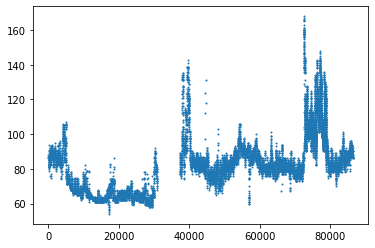

In [3]:
plt.scatter(pointcloud[:, 0], pointcloud[:, 1], s=1)

In [4]:
def testplot(start, interval):
    range = (pointcloud[:,0] > start)*(pointcloud[:,0] < start + interval)
    pc = pointcloud[range]
    plt.scatter(pc[:, 0], pc[:, 1], s=1)
    hc.PDList.from_alpha_filtration(pc, 
                                save_to="tmp.pdgm",
                                save_boundary_map=True)
    pdlist = hc.PDList("tmp.pdgm")
    pd1 = sleeppdlist.dth_diagram(1)
    pd1.histogram().plot()
    #pd1.histogram((50, 200),128).plot(colorbar={"type": "log"})

In [ ]:
testplot(2000, 1200)

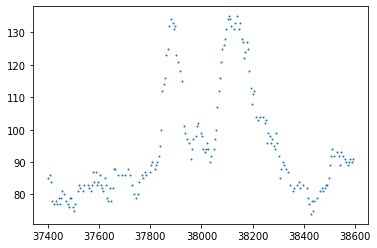

In [66]:
testplot(37400, 1200)

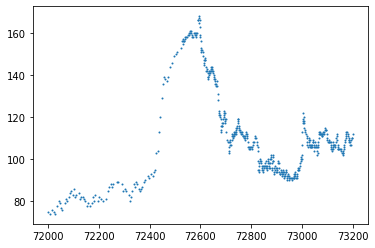

In [71]:
testplot(72000, 1200)